<h1>Numpy and Matplotlib<h1>

<h2>Part 1: Creating and Manipulating Arrays<h2>

First import numpy and matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt

1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan. Both should cover the range (-2, 2) and have 100 points in each direction.

In [2]:
y = np.linspace(-2,2,100)
x = np.linspace(-2,2,100)
xx, yy = np.meshgrid(x,y)
xx.shape, yy.shape

# correct

((100, 100), (100, 100))

1.2. Visualize each 2D array using pcolormesh

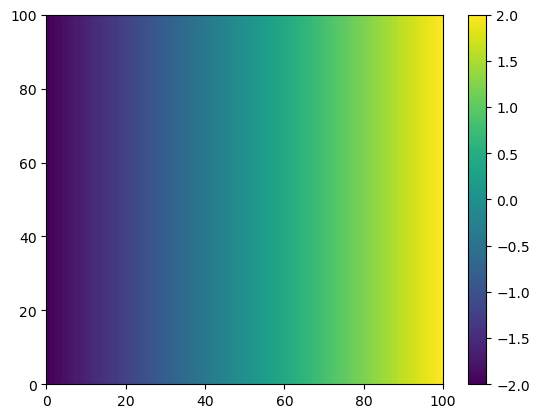

In [4]:
plt.pcolormesh(xx)
plt.colorbar() # I would suggest adding a color bar too!

# correct

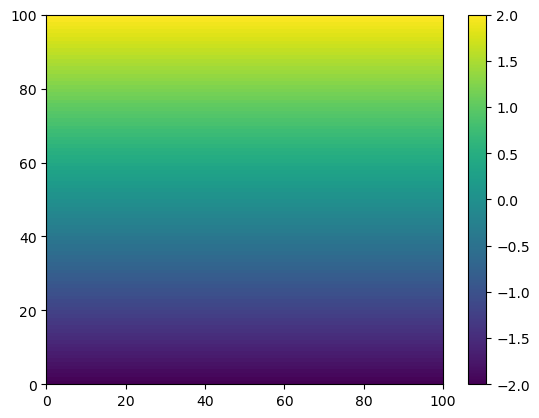

In [13]:
plt.pcolormesh(yy)
plt.colorbar()

# correct

1.3 From your cartesian coordinates, create polar coordinates r
 and φ (phi = angle)

In [5]:
r = (xx ** (2) + yy ** (2)) ** (1/2)
phi = np.arctan2(xx, yy)

# correct

1.4. Visualize r and phi on the 2D x/y plane using pcolormesh

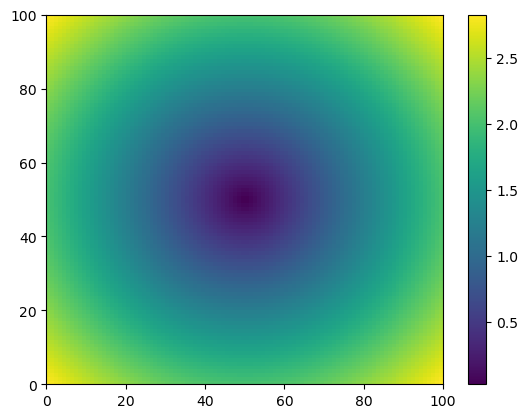

In [6]:
plt.pcolormesh(r)
plt.colorbar()

# correct

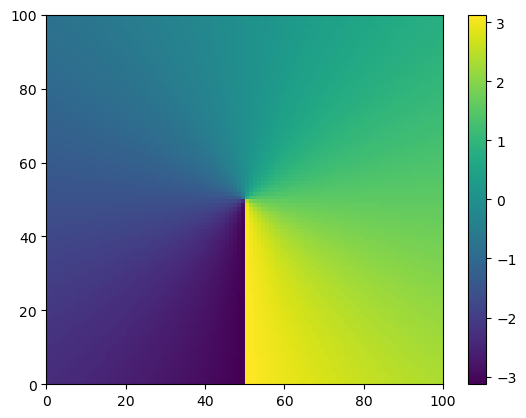

In [7]:
plt.pcolormesh(phi)
plt.colorbar()

# correct

1.5 Calculate the quantity f = cos^2(4r) + sin^2(4phi) and plot it on the x,y plane

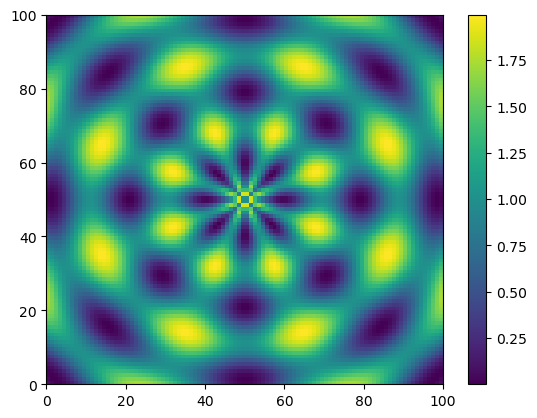

In [8]:
f = np.cos(4 * r) ** (2) + np.sin(4 * phi) ** (2)
plt.pcolormesh(f)
plt.colorbar()

1.6 Plot the mean of f with respect to the x axis as a function of y

Text(0.5, 0, 'mean of f with respect to x axis')

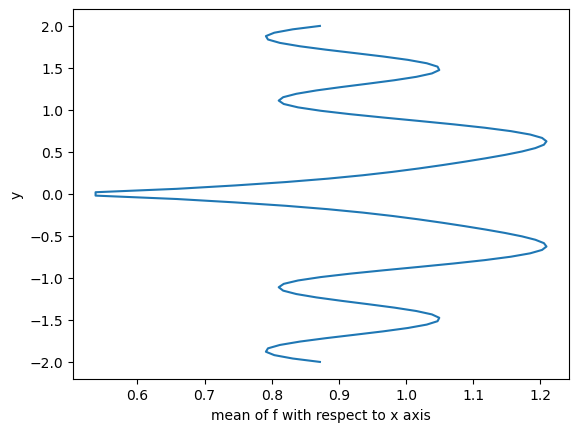

In [9]:
f_xmean = f.mean(axis = 1)
plt.plot(f_xmean, y)
plt.ylabel('y')
plt.xlabel('mean of f with respect to x axis')

1.7 Plot the mean of f with respect to the y axis as a function of x

Text(0, 0.5, 'mean of f with respect to y')

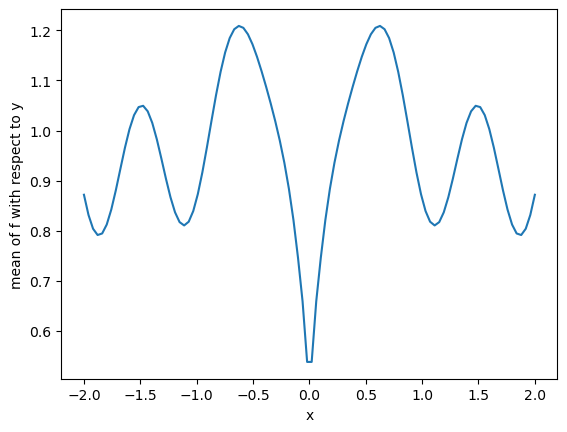

In [10]:
f_ymean = f.mean(axis = 0)
plt.plot(x, f_ymean)

plt.xlabel('x')
plt.ylabel('mean of f with respect to y')

1.8 Plot the mean of f with respect to phi as a function of r.  This is hard. You will need to define a discrete range of r values and then figure out how to average fwithin the bins defined by your grid. There are many different ways to accomplish this.

I started out by thinking of r and phi as 1-D coordinates. Since you can only take np.mean across an axis, we need to set r and phi as our axes. I'm going to start out by making r and phi, and then treating them like our x and y axes earlier. I started out by making a 1D r coordinate using $ \sqrt{x^2 + y^2} $

In [13]:
r_1d = (x**2 + y**2)**(1/2)

1D phi coordinate using $ arctan(\frac{y}{x}) $

In [14]:
phi_1d = np.arctan(x, y)

 Just like we did earlier with x and y and turning them into xx and yy using np.meshgrid, I'm going to turn r_1d and phi_1d into rr and phiphi with meshgrid.

In [15]:
rr, phiphi = np.meshgrid(r_1d, phi_1d)

Here, r is analogous to x. It's smallest near the center and largest towards larger abs(x).

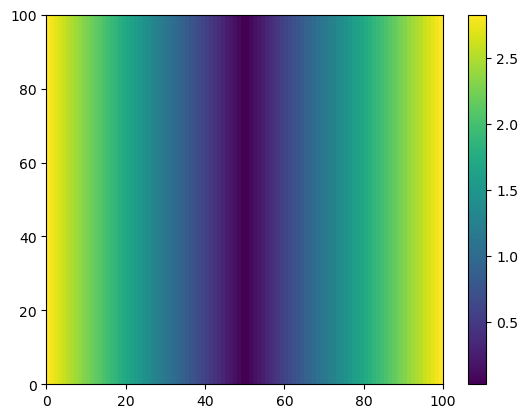

In [16]:
plt.pcolormesh(rr)
plt.colorbar()

phi increases with y in our grid.

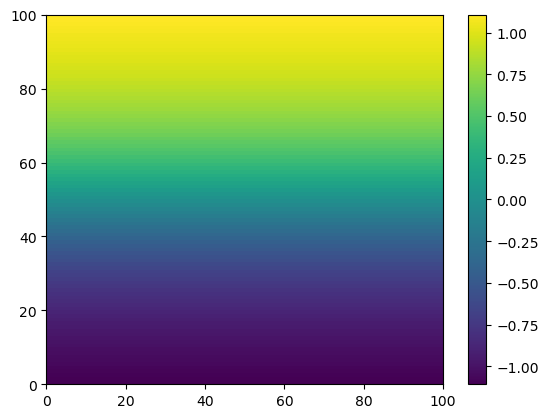

In [17]:
plt.pcolormesh(phiphi)
plt.colorbar()

Just like before, we'll make f. Then we'll take the mean with respect to phi. (Similar to taking a mean with respect to y)

In [29]:
f_1d = np.cos(4 * rr) ** (2) + np.sin(4 * phiphi) ** (2)
f_1d_mean = f_1d.mean(axis=0)

Our f_1d grid is similar to our original f_1d grid, except phi is on the y axis and r is on the x axis. 

C:\Users\mailes2\AppData\Local\Temp\ipykernel_15648\1024603051.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax1.pcolormesh(r_1d, phi_1d, f_1d)


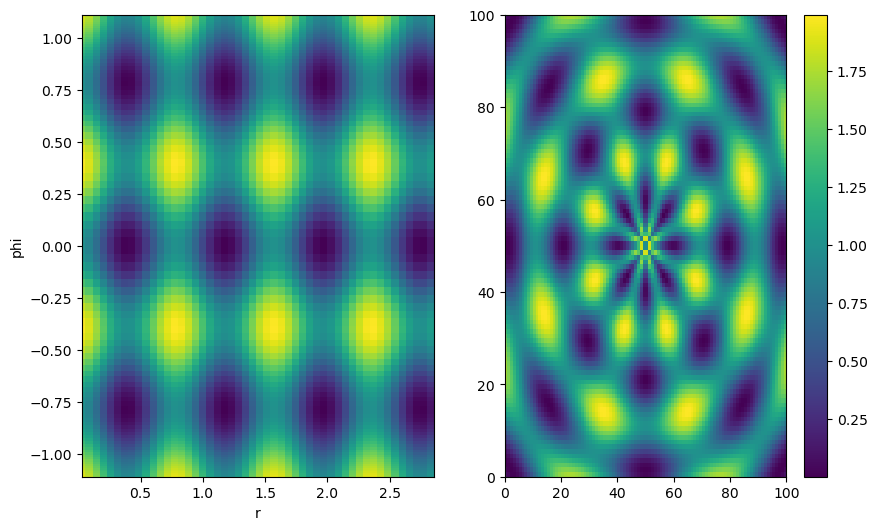

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.pcolormesh(r_1d, phi_1d, f_1d)
ax1.set_ylabel('phi')
ax1.set_xlabel('r')

ax2.pcolormesh(f)
f_bar = ax2.pcolormesh(f)
plt.colorbar(f_bar)

In [23]:
f_1d_mean

array([0.57796009, 0.48812156, 0.49931228, 0.60923428, 0.79531565,
       1.01934553, 1.23532053, 1.39889129, 1.47646938, 1.45212454,
       1.33085587, 1.13756525, 0.91194394, 0.70032212, 0.54615524,
       0.48110069, 0.51851708, 0.65072116, 0.85056548, 1.07701304,
       1.283564  , 1.42780416, 1.48011454, 1.42975349, 1.28706237,
       1.08134209, 0.85483625, 0.65405667, 0.52023241, 0.48084359,
       0.54397852, 0.69667275, 0.9075713 , 1.13336724, 1.32769453,
       1.45064904, 1.47698269, 1.40128802, 1.23910852, 1.02374694,
       0.79942667, 0.61221073, 0.50054296, 0.48735376, 0.57535148,
       0.74646622, 0.96556045, 1.1876443 , 1.36711397, 1.46711628,
       1.46711628, 1.36711397, 1.1876443 , 0.96556045, 0.74646622,
       0.57535148, 0.48735376, 0.50054296, 0.61221073, 0.79942667,
       1.02374694, 1.23910852, 1.40128802, 1.47698269, 1.45064904,
       1.32769453, 1.13336724, 0.9075713 , 0.69667275, 0.54397852,
       0.48084359, 0.52023241, 0.65405667, 0.85483625, 1.08134

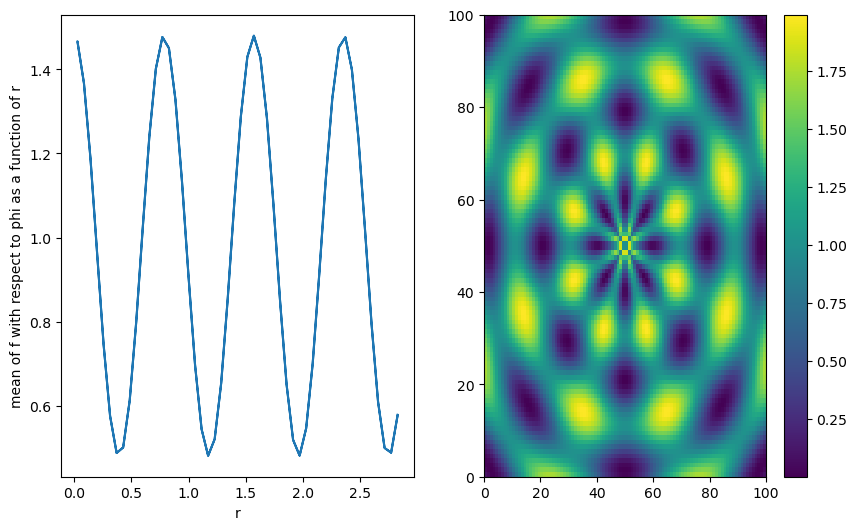

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.plot(r_1d, f_1d_mean)
ax1.set_xlabel('r')
ax1.set_ylabel('mean of f with respect to phi as a function of r')

f_bar = ax2.pcolormesh(f)
plt.colorbar(f_bar)

<h2> Part 2: Analyze ARGO Data<h2>

In [53]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

C:\Users\mailes2\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


['C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\date.npy',
 'C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\lat.npy',
 'C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\levels.npy',
 'C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\lon.npy',
 'C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\P.npy',
 'C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\S.npy',
 'C:\\Users\\mailes2\\AppData\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\T.

2.1 Load each data file as a numpy array.

In [54]:
T = np.load("T.npy") #temperature
s = np.load("S.npy") #salinity
P = np.load("P.npy") #pressure
date = np.load("date.npy") #date
lat = np.load("lat.npy") #latitude
lon = np.load("lon.npy") #longitude
level = np.load("levels.npy") #depth level

2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related? Based on the shapes, which dimensions do you think are shared among the arrays?

In [55]:
T.shape #output: (78,75)
s.shape #output: (78,75)
P.shape #output: (78,75)
lon.shape #output: (75,)
lat.shape #output:(75,)
date.shape #output: (75,)
level.shape #output: (78,)

(78,)

In [59]:
T

array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
        21.82299995, 20.13100052],
       [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
        19.45999908, 20.125     ],
       [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
        19.26199913, 20.07699966],
       ...,
       [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
         3.81100011,  3.8599999 ],
       [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
         3.74600005,  3.80599999],
       [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
         3.71399999,         nan]])

Temperature, salinity, and pressure all have the same shapes. Longitude, latitude, and date have the same shape. Level is different. This is probably because level is 3rd dimensional compared to the 2-D longitude and latitude measurements. Therefore level would have its own dimension and different elements in the array.

Longitude and latitude correspond with each other, therefore having the same elements in their array. The date also has 75 elements because it was measured with 75 dates (with 75 different lon/lat/diff placements)
 
The temperature, salinity, and pressure of the profile are affected by the longitude, latitude, and level. Because of that, I think that is why they obtain two dimensions with the first that contains 78 elements and the second that has 75 elements. 

2.3 Make a plot for each column of data in T, S and P (three plots). The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.

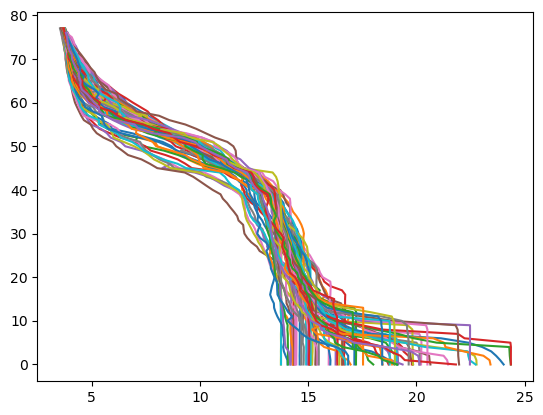

In [56]:
plt.plot(T, level)

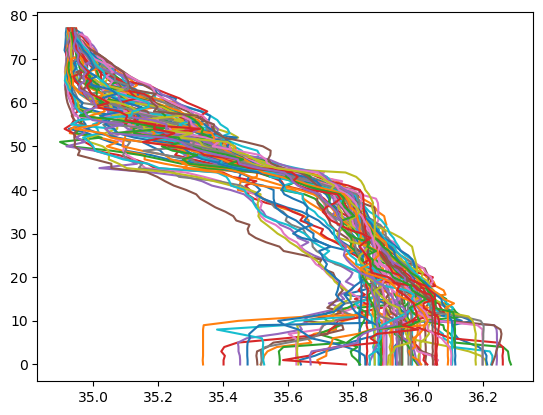

In [57]:
plt.plot(s, level)

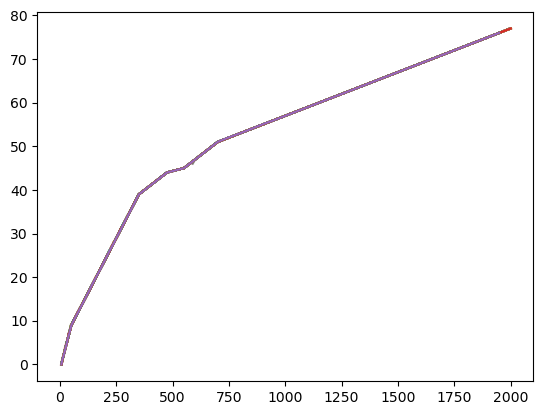

In [58]:
plt.plot(P, level)

2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [87]:
#do i have to iterate or does it alr calculate it at each depth

# You'll need to iterate at each depth, so I believe you're doing this correctly.

t_mean_list = []
t_std_list = []
s_mean_list = []
s_std_list = []
p_mean_list = []
p_std_list = []
#the thing is it's not taking mean at that point
for i in range(len(level)):
    t_mean = T[i].mean()
    t_mean_list.append(t_mean)
    t_std = T[i].std()
    t_std_list.append(t_std)
    s_mean = s[i].mean()
    s_std = s[i].std()
    p_mean = P[i].mean()
    p_std = P[i].std()
    s_mean_list.append(s_mean)
    s_std_list.append(s_std)
    p_mean_list.append(p_mean)
    p_std_list.append(p_std)

2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

<ErrorbarContainer object of 3 artists>

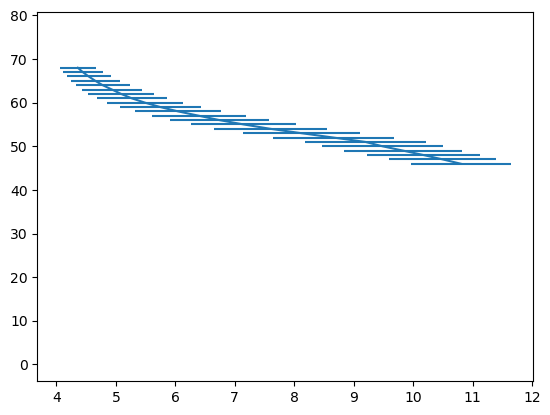

In [88]:
# plt.plot(t_mean_list, level)
plt.errorbar(t_mean_list, level, xerr = t_std_list)

<ErrorbarContainer object of 3 artists>

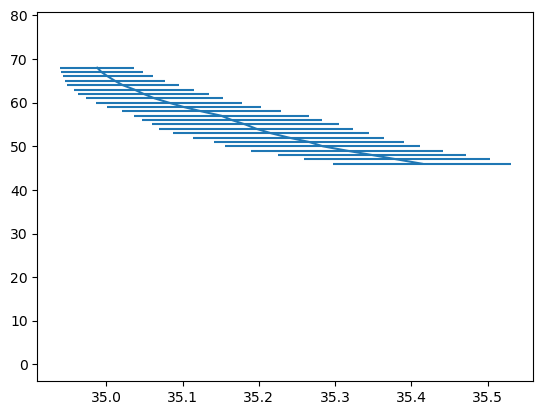

In [89]:
plt.errorbar(s_mean_list, level, xerr = s_std_list)

<ErrorbarContainer object of 3 artists>

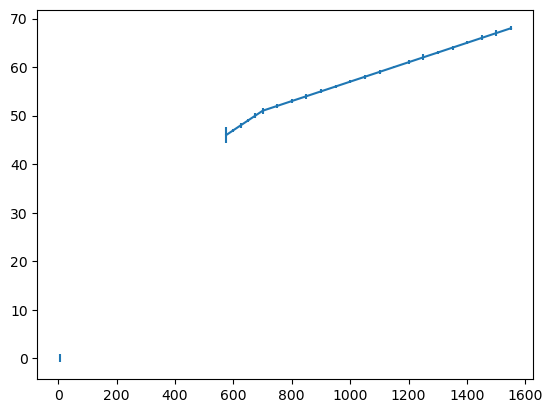

In [90]:
plt.errorbar(p_mean_list, level, yerr = p_std_list)
#this one is so small how do i make it bigger

2.6 Account For Missing Data. The profiles contain many missing values. These are indicated by the special “Not a Number” value, or np.nan. When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions np.nanmean and np.nanstd, you tell NumPy to ignore the NaNs. Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [91]:
#prob should have wrote function for this
#did i do this wrong hmm

# For this step, you'll want to do the same as the last step, but use nanmean and nanstd in place of mean and std. 
# Also, a.nanmean() doesn't work, you'll need to call it like np.nanmean(a).

# np.nanmean(T) Doing this takes a mean of the whole array, and it won't save unless it gets assigned to a value.
#np.nanstd(T)
#np.nanmean(s)
#np.nanstd(s)
#np.nanmean(P)
#np.nanstd(P)

t_mean_list = []
t_std_list = []
s_mean_list = []
s_std_list = []
p_mean_list = []
p_std_list = []
for i in range(len(level)):
    t_mean = np.nanmean(T[i])
    t_mean_list.append(t_mean)
    t_std = np.nanstd(T[i])
    t_std_list.append(t_std)
    s_mean = np.nanmean(s[i])
    s_std = np.nanstd(s[i])
    p_mean = np.nanmean(P[i])
    p_std = np.nanstd(P[i])
    s_mean_list.append(s_mean)
    s_std_list.append(s_std)
    p_mean_list.append(p_mean)
    p_std_list.append(p_std)

<ErrorbarContainer object of 3 artists>

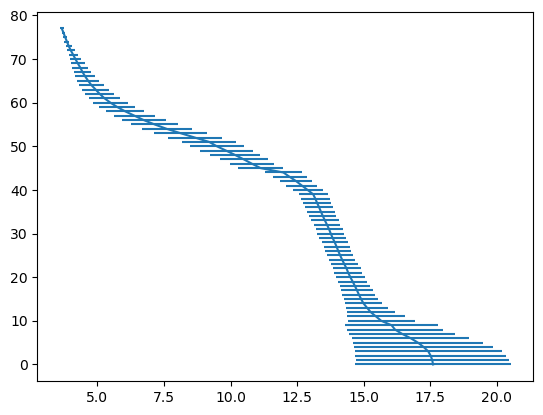

In [92]:
plt.errorbar(t_mean_list, level, xerr = t_std_list)

# It should now plot over the whole atmosphere, instead of from about 85 to 65.

<ErrorbarContainer object of 3 artists>

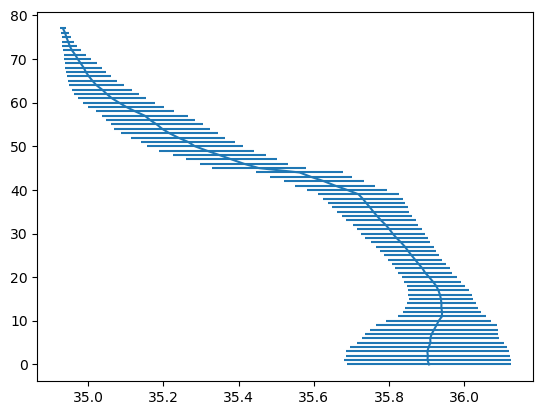

In [93]:
plt.errorbar(s_mean_list, level, xerr = s_std_list)


<ErrorbarContainer object of 3 artists>

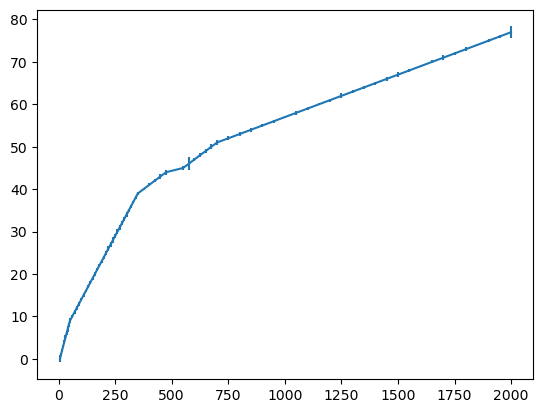

In [94]:
plt.errorbar(p_mean_list, level, yerr = p_std_list)

2.7 Create a scatter plot of the lon, lat positions of the ARGO float.

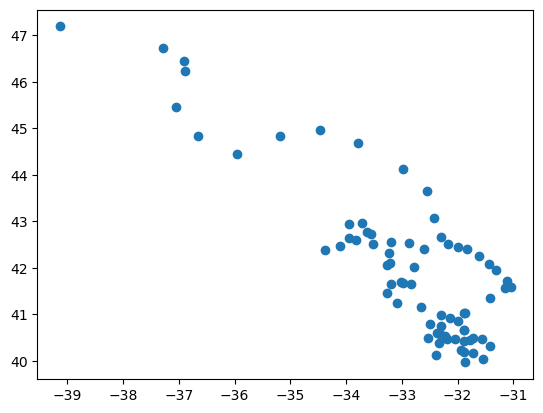

In [95]:
plt.scatter(lon, lat)

NOTE: I don't think I did 2.4, 2.5, 2.6 correct. I still need to finish 1.8.